In [1]:
import networkx as nx
from networkx.generators.classic import complete_graph
from math import floor, ceil
import numpy as np
from random import choices

class RandomGraph:
    
    def __init__(self, k):
        """
        creates an initial complete graph of size k+1
        """
        self.k = k
        self.graph = nx.complete_graph(k+1)
        
    def grow(self, n_iterations):
            
        for i in range(n_iterations):
            new_node = len(self.graph) # node numeration starts at 0
            nodes_link_added = set()
            n_edges_to_add = floor(self.k/2) if i % 2 == 0 else ceil(self.k/2)
            
            for _ in range(n_edges_to_add):
                distrib = np.array([d if n not in nodes_link_added else 0 for n,d in self.graph.degree])
                distrib = distrib / sum(distrib)
                node_to_link = choices(range(len(self.graph)), weights = distrib ,k=1)[0]
                nodes_link_added.add(node_to_link)
                    
                    
            self.graph.add_node(new_node)
            self.graph.add_edges_from([(new_node, node) for node in nodes_link_added])
        
        
        
    

In [2]:
g = RandomGraph(4)
g.grow(100)

4.0


(array([84.,  9.,  5.,  0.,  3.,  1.,  1.,  0.,  1.,  1.]),
 array([ 2. ,  4.4,  6.8,  9.2, 11.6, 14. , 16.4, 18.8, 21.2, 23.6, 26. ]),
 <BarContainer object of 10 artists>)

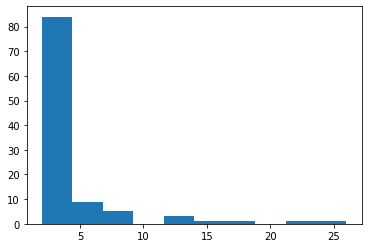

In [3]:
import matplotlib.pyplot as plt
degrees = [d for n,d in g.graph.degree]
print(np.mean(degrees))
plt.hist(degrees)

Average degree (15 expected) : 15.0


Text(0, 0.5, 'Frequency')

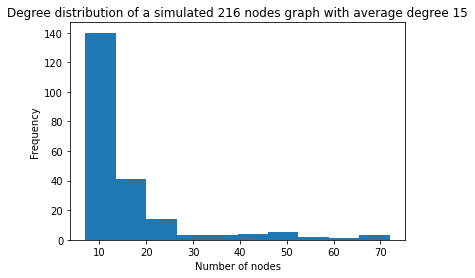

In [4]:
g = RandomGraph(15)
g.grow(200)
degrees = [d for n,d in g.graph.degree]
print("Average degree (15 expected) :", np.mean(degrees))
plt.hist(degrees)
plt.title("Degree distribution of a simulated 216 nodes graph with average degree 15")
plt.xlabel("Number of nodes")
plt.ylabel("Frequency")